In [2]:
import texthero as hero

In [3]:
import pandas as pd

In [7]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

In [1]:
import pickle
# load the model from disk
svm_classifier = pickle.load(open('depression_model.sav', 'rb'))

In [2]:
import texthero as hero
sample = {'My hair is ruining my life!!!!!!','I dont know whats wrong with me. My emotions fluctuate all the time. I want to see the light at the end of the tunnel','I feel frantic all the time','Nothing makes me happy anymore. Cannot find comfort in anything i do.','I dont think drugs are a good idea to solve problems. I do occasionally drink but its not a problem. Its just to relax and have a good time','I have always been encouraged to pursue what i like and its always made me feel content and happy','My family is very supportive but despite that i lack motivation and that makes me feel low. Sometimes i feel like i should end it all','i dont stress about it a lot','i was feeling low and listening to sad songs made me more depressed i started thinking that i am worth nothing','i am very happy about it'}

import pandas as pd
df = pd.DataFrame(sample, columns = ['sample'])
df['clean_data'] = hero.clean(df['sample'])
sample_sent = df['clean_data'].tolist() 

from sentence_transformers import SentenceTransformer
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')
samp_embeddings = model.encode(sample_sent)
df

,sample,clean_data
0,i was feeling low and listening to sad songs m...,feeling low listening sad songs made depressed...
1,Nothing makes me happy anymore. Cannot find co...,nothing makes happy anymore cannot find comfor...
2,My hair is ruining my life!!!!!!,hair ruining life
3,i am very happy about it,happy
4,I feel frantic all the time,feel frantic time
5,I have always been encouraged to pursue what i...,always encouraged pursue like always made feel...
6,i dont stress about it a lot,dont stress lot
7,My family is very supportive but despite that ...,family supportive despite lack motivation make...
8,I dont think drugs are a good idea to solve pr...,dont think drugs good idea solve problems occa...
9,I dont know whats wrong with me. My emotions f...,dont know whats wrong emotions fluctuate time ...


In [10]:
predicted_value = svm_classifier.predict(samp_embeddings[1].reshape(1,-1))

In [11]:
if predicted_value[0] == 0:
    print('Answer is Normal')
else:
    print('Answer shows Depression')

Answer is Normal


In [9]:
predicted_value

array([0])

In [17]:
predictions = []
for val in range(0,len(samp_embeddings)):
    predicted_value = svm_classifier.predict(samp_embeddings[val].reshape(1,-1))
    predictions.append(predicted_value)

In [22]:
predictions

[array([1]),
 array([1]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([1]),
 array([0]),
 array([1])]

In [20]:
depress = 0
normal = 0
for val in range(0,len(samp_embeddings)):
    if predictions[val] == 0:
        normal+=1
    else:
        depress+=1

In [21]:
normal

6

In [26]:
sample

{'I dont know whats wrong with me. My emotions fluctuate all the time. I want to see the light at the end of the tunnel',
 'I dont think drugs are a good idea to solve problems. I do occasionally drink but its not a problem. Its just to relax and have a good time',
 'I feel frantic all the time',
 'I have always been encouraged to pursue what i like and its always made me feel content and happy',
 'My family is very supportive but despite that i lack motivation and that makes me feel low. Sometimes i feel like i should end it all',
 'My hair is ruining my life!!!!!!',
 'Nothing makes me happy anymore. Cannot find comfort in anything i do.',
 'i am very happy about it',
 'i dont stress about it a lot',
 'i was feeling low and listening to sad songs made me more depressed i started thinking that i am worth nothing'}

In [25]:
def get_preds(answers):
    df = pd.DataFrame(answers, columns = ['sample'])
    df['clean_data'] = hero.clean(df['sample'])
    sample_sent = df['clean_data'].tolist() 
    model = SentenceTransformer('paraphrase-MiniLM-L6-v2')
    samp_embeddings = model.encode(sample_sent)
    predictions = []
    for val in range(0,len(samp_embeddings)):
        predicted_value = svm_classifier.predict(samp_embeddings[val].reshape(1,-1))
        predictions.append(predicted_value)
    depress = 0
    normal = 0
    for val in range(0,len(samp_embeddings)):
        if predictions[val] == 0:
            normal+=1
        else:
            depress+=1
    return depress,normal

In [27]:
a,b = get_preds(sample)

In [28]:
a

4

In [29]:
b

6

In [2]:
import numpy as np
embeddings = np.load('newembeddings.npz')

In [3]:
embedds=embeddings['arr_0']

In [5]:
import pandas as pd
text_data = pd.read_csv('D:/Sem 8/END SEM PROJECT/mixed_data.csv',encoding = "ISO-8859-1")
text_data
y = np.asarray(text_data['Marker'])
label_map = {cat:index for index,cat in enumerate(np.unique(y))}
y_prep = np.asarray([label_map[l] for l in y])

label_map

{'Normal': 0, 'depression': 1}

In [6]:
import numpy as np
import pandas as pd
import gensim
import nltk
import re
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
x_train,x_test,y_train,y_test = train_test_split(embedds,y_prep,test_size=0.2,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(153795, 384)
(38449, 384)
(153795,)
(38449,)


In [7]:
svm_classifier.score(x_test,y_test)

0.9876979895445915

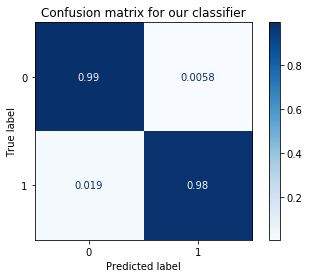

In [9]:
from sklearn import svm
from sklearn.metrics import plot_confusion_matrix
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
matrix = plot_confusion_matrix(svm_classifier, x_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
plt.title('Confusion matrix for our classifier')
plt.show(matrix)
plt.show()

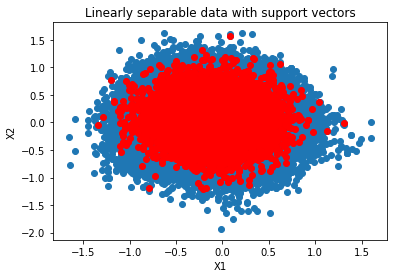

ValueError: Filler values must be provided when X has more than 2 training features.

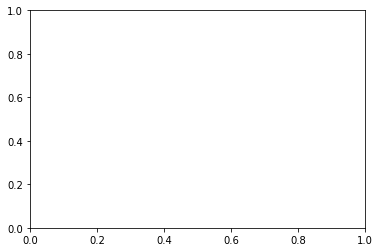

In [14]:
support_vectors = svm_classifier.support_vectors_

# Visualize support vectors
plt.scatter(x_train[:,0], x_train[:,1])
plt.scatter(support_vectors[:,0], support_vectors[:,1], color='red')
plt.title('Linearly separable data with support vectors')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

# Plot decision boundary
plot_decision_regions(x_test, y_test, clf=svm_classifier,   filler_feature_values={2: value, 3:value, 4:value},
                  filler_feature_ranges={2: width, 3: width, 4:width}, legend=2)
plt.show()

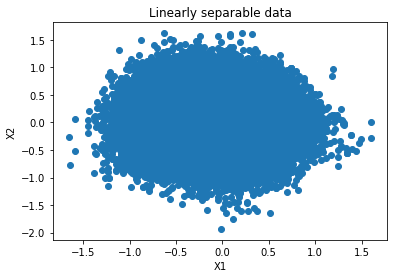

In [10]:
plt.scatter(x_train[:,0], x_train[:,1])
plt.title('Linearly separable data')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [38]:
import texthero as hero
sample = {'I am feeling good.','it was really depressing. There was another fight at home and other incidents. I cannot take it anymore.','I have never liked drugs and dont likt the idea of them. But i have heard that they soothe pain so if it helps i might try them to feel better.','I like sad and goory songs.',
          'I think it only happens to me that some problem suddenly arises and i have to face it alone. I freak out and panic.','I am constantly living in the past or worried about the future.',
          'I usually do know the reason for my behavior but also justify it. When i am sad usually wrong thoughts come to my mind','I have a weak focus because of which it also affects my professional life.','I used to do a lot of activities. I used to have a lot of hobbies but with time all that is left behind me. I am just not motivated enough to pick up activities.','I do think about death a lot and sometimes i just think that everything would be better if i just end it all.'}

import pandas as pd
df = pd.DataFrame(sample, columns = ['sample'])
df['clean_data'] = hero.clean(df['sample'])
sample_sent = df['clean_data'].tolist() 

from sentence_transformers import SentenceTransformer
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')
samp_embeddings = model.encode(sample_sent)
df

,sample,clean_data
0,I do think about death a lot and sometimes i j...,think death lot sometimes think everything wou...
1,I have a weak focus because of which it also a...,weak focus also affects professional life
2,it was really depressing. There was another fi...,really depressing another fight home incidents...
3,I am constantly living in the past or worried ...,constantly living past worried future
4,I am feeling good.,feeling good
5,I like sad and goory songs.,like sad goory songs
6,I think it only happens to me that some proble...,think happens problem suddenly arises face alo...
7,I usually do know the reason for my behavior b...,usually know reason behavior also justify sad ...
8,I used to do a lot of activities. I used to ha...,used lot activities used lot hobbies time left...
9,I have never liked drugs and dont likt the ide...,never liked drugs dont likt idea heard soothe ...


In [64]:
predicted_value = svm_classifier.predict(samp_embeddings[8].reshape(1,-1))

In [65]:
if predicted_value[0] == 0:
    print('Answer is Normal')
else:
    print('Answer shows Depression')

Answer is Normal


In [41]:
def get_preds(answers):
    svm_classifier = pickle.load(open('depression_model.sav', 'rb'))
    df = pd.DataFrame(answers, columns = ['sample'])
    df['clean_data'] = hero.clean(df['sample'])
    sample_sent = df['clean_data'].tolist() 
    model = SentenceTransformer('paraphrase-MiniLM-L6-v2')
    samp_embeddings = model.encode(sample_sent)
    predictions = []
    for val in range(0,len(samp_embeddings)):
        predicted_value = svm_classifier.predict(samp_embeddings[val].reshape(1,-1))
        predictions.append(predicted_value)
    depress = 0
    normal = 0
    for val in range(0,len(samp_embeddings)):
        if predictions[val] == 0:
            normal+=1
        else:
            depress+=1
    return depress,normal

In [42]:
depress,normal =  get_preds(sample)

In [43]:
depress

6

In [66]:
sample1 = ['I feel a sense of contentment in myself.',

'It has been a hectic month. I had to face a lot of issues in my professional and personal life but i pulled through. I am fine now.',

'I dont think drugs are a good idea to solve problems. I do occasionally drink but its not a problem.',

'I like pop music it cheers me up.',

'I try to assess the problem and find a solution for it. Being calm has always helped me to easily try to find answers.',

'I do think about the past but I like to live in the present. It helps me to concentrate and focus on myself.',

'I dont let situations affect my mood. I do know whats the reason behind my mood but i always try to stay calm and not let situations define me.',

'I barely get distracted easily. So I have good hold on my focus.',

'I do like to pursue my hobbies. It helps me uplift my mood and sets perspective straight.',

'I have not thought about suicide or death explicitly.']